In [3]:
import scipy.io
import matplotlib.pyplot as plt
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import math
import datetime
import csv
from sklearn.utils import shuffle
from scipy.signal import butter, filtfilt, decimate, freqz
from scipy.signal import stft
from scipy import stats
import funciones as mifu

Veamos las precisiones para la modalidad y artefactos

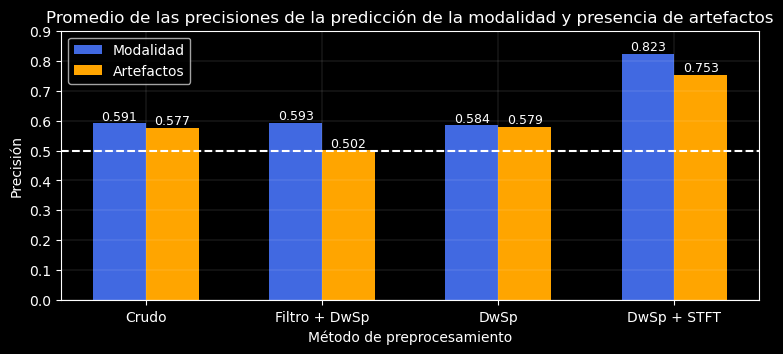

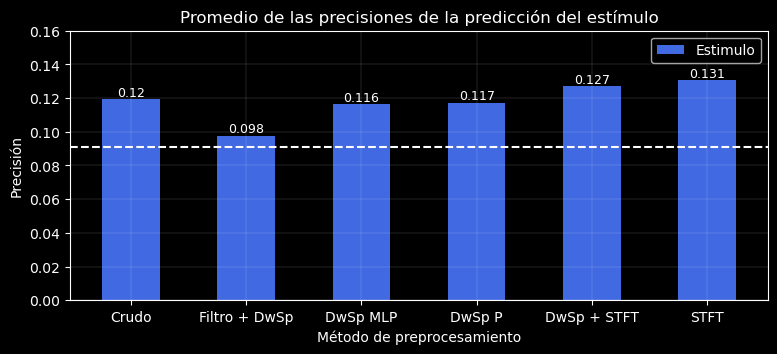

[0.5912, 0.5926580539067294, 0.5835978824105129, 0.8233888624088432] [0.5767, 0.5018745093835815, 0.5794254335812852, 0.753209528061877] [0.1195, 0.09762838695276946, 0.11627763045077903, 0.11734228838323606, 0.1268893822675722, 0.1305560349257696]


In [104]:
# Modalidad y artefacto

ruta = os.path.join('historial.csv')
with open(ruta, mode='r', newline='', encoding='latin-1') as archivo:
    lector_csv = csv.reader(archivo)
    datos = []
    for i in lector_csv:
        datos.append(i)

datos_arreglados = []
for i in datos:
    j = []
    j.append(float(i[0]))
    j.append(float(i[1]))
    k = i[2].split('/')
    k[3] = k[3][1:-1].split(' ')
    m = []
    for n in k[3]:
        m.append(int(n))
    j.append(int(k[0][1:]))
    j.append(k[1])
    j.append(k[2])
    j.append(m)
    j.append(i[3])
    j.append(i[4])
    datos_arreglados.append(j)
datos = datos_arreglados
datos = datos[450:585]

valores = []
for sujeto in range(1, 16):
    valores.append([])
    for prediccion in ['modalidad', 'estimulo', 'artefacto']:
        aux = []
        for i in datos:
            if i[2] == sujeto and i[4] == prediccion:
                aux.append([i[0], i[1]])
        valores[sujeto - 1].append(aux)
valores = np.array(valores)

prom_cm = 0.5912
prom_fm = float(np.mean(valores[:, 0, 0, 0]))
prom_dm = float(np.mean(valores[:, 0, 1, 0]))
prom_sm = float(np.mean(valores[:, 0, 2, 0]))

categorias = ['Crudo', 'Filtro + DwSp', 'DwSp', 'DwSp + STFT']
promedios_m = [prom_cm, prom_fm, prom_dm, prom_sm]

prom_ca = 0.5767
prom_fa = float(np.mean(valores[:, 2, 0, 0]))
prom_da = float(np.mean(valores[:, 2, 1, 0]))
prom_sa = float(np.mean(valores[:, 2, 2, 0]))

promedios_a = [prom_ca, prom_fa, prom_da, prom_sa]

fig, ax = plt.subplots(figsize = (9, 3.5))
plt.style.use('dark_background')
barras_m = ax.bar(np.arange(len(categorias)) - 0.3/2, promedios_m, width = 0.3, label = 'Modalidad', color = 'royalblue')
barras_a = ax.bar(np.arange(len(categorias)) + 0.3/2, promedios_a, width = 0.3, label = 'Artefactos', color = 'orange')

for barra in barras_m:
    ax.text(barra.get_x() + barra.get_width()/2, barra.get_height(), f'{round(barra.get_height(), 3)}', 
            ha='center', va='bottom', fontsize = 9)

for barra in barras_a:
    ax.text(barra.get_x() + barra.get_width()/2, barra.get_height(), f'{round(barra.get_height(), 3)}', 
            ha='center', va='bottom', fontsize = 9)

ax.set_xlabel('Método de preprocesamiento')
ax.set_ylabel('Precisión')
ax.set_title('Promedio de las precisiones de la predicción de la modalidad y presencia de artefactos')
ax.grid(linewidth = 0.1)
ax.set_xticks(np.arange(len(categorias)))
ax.set_xticklabels(categorias)
ax.set_ylim((0, 0.9))
ax.legend()

plt.axhline(y = 0.5, color = 'white', linestyle = '--', linewidth = 1.5)
plt.show()

###########################################################################################################################################################
# Estimulo

ruta = os.path.join('historial.csv')
with open(ruta, mode='r', newline='', encoding='latin-1') as archivo:
    lector_csv = csv.reader(archivo)
    datos = []
    for i in lector_csv:
        datos.append(i)

datos_arreglados = []
for i in datos:
    j = []
    j.append(float(i[0]))
    j.append(float(i[1]))
    k = i[2].split('/')
    k[3] = k[3][1:-1].split(' ')
    m = []
    for n in k[3]:
        m.append(int(n))
    j.append(int(k[0][1:]))
    j.append(k[1])
    j.append(k[2])
    j.append(m)
    j.append(i[3])
    j.append(i[4])
    datos_arreglados.append(j)
datos = datos_arreglados
datos = datos[450:]

valores = []
for sujeto in range(1, 16):
    valores.append([])
    for prediccion in ['estimulo']:
        aux = []
        for i in datos:
            if i[2] == sujeto and i[4] == prediccion:
                aux.append([i[0], i[1]])
        valores[sujeto - 1].append(aux)
valores = np.array(valores)

valores[:, :, 0, 0]

prom_c = 0.1195
prom_f = float(np.mean(valores[:, 0, 0, 0]))
prom_d = float(np.mean(valores[:, 0, 1, 0]))
prom_sd = float(np.mean(valores[:, 0, 2, 0]))
prom_dp = float(np.mean(valores[:, 0, 3, 0]))
prom_s = float(np.mean(valores[:, 0, 4, 0]))

categorias = ['Crudo', 'Filtro + DwSp', 'DwSp MLP', 'DwSp P', 'DwSp + STFT', 'STFT']
promedios = [prom_c, prom_f, prom_d, prom_dp, prom_sd, prom_s]

fig, ax = plt.subplots(figsize = (9, 3.5))
plt.style.use('dark_background')
barras_e = ax.bar(np.arange(len(categorias)), promedios, width = 0.5, label = 'Estimulo', color = 'royalblue')

for barra in barras_e:
    ax.text(barra.get_x() + barra.get_width()/2, barra.get_height(), f'{round(barra.get_height(), 3)}', 
            ha='center', va='bottom', fontsize = 9)

ax.set_xlabel('Método de preprocesamiento')
ax.set_ylabel('Precisión')
ax.set_title('Promedio de las precisiones de la predicción del estímulo')
ax.grid(linewidth = 0.1)
ax.set_xticks(np.arange(len(categorias)))
ax.set_xticklabels(categorias)
ax.set_ylim((0, 0.16))
ax.legend()

plt.axhline(y = 1/11, color = 'white', linestyle = '--', linewidth = 1.5)
plt.show()



print(promedios_m, promedios_a, promedios)